In [100]:
import pandas as pd
import numpy as np
from pathlib import Path
from os import listdir

In [101]:
path_source = Path("./source_data")
file_names = listdir(path_source)

path_edited = Path("./edited_data")

In [102]:
path_edited

WindowsPath('edited_data')

In [103]:
def transform(df):
    _len = df.shape[0]
    _max, _min = df["degree"].max(), df["degree"].min()
    arr = np.linspace(_min, _max, _len)
    df["degree"] = arr
    max_intensive_idx = df["intensive"].idxmax()
    point_shift = int(_len / 2) - max_intensive_idx
    delta = arr[1] - arr[0]
    shift = delta * point_shift
    df["degree"] += shift
    return df

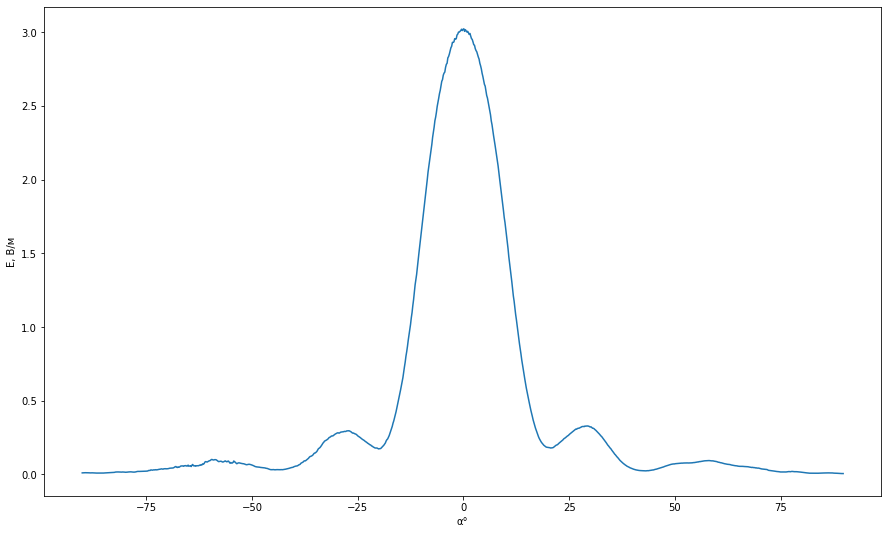

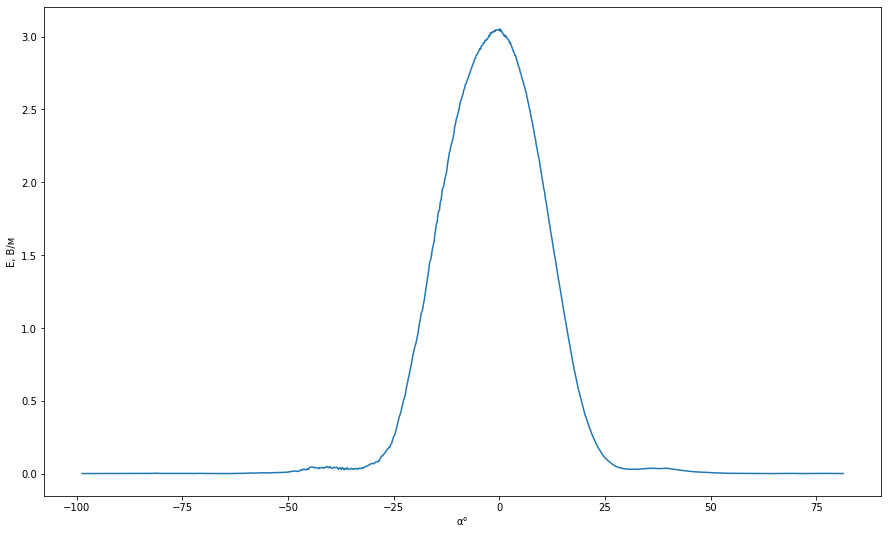

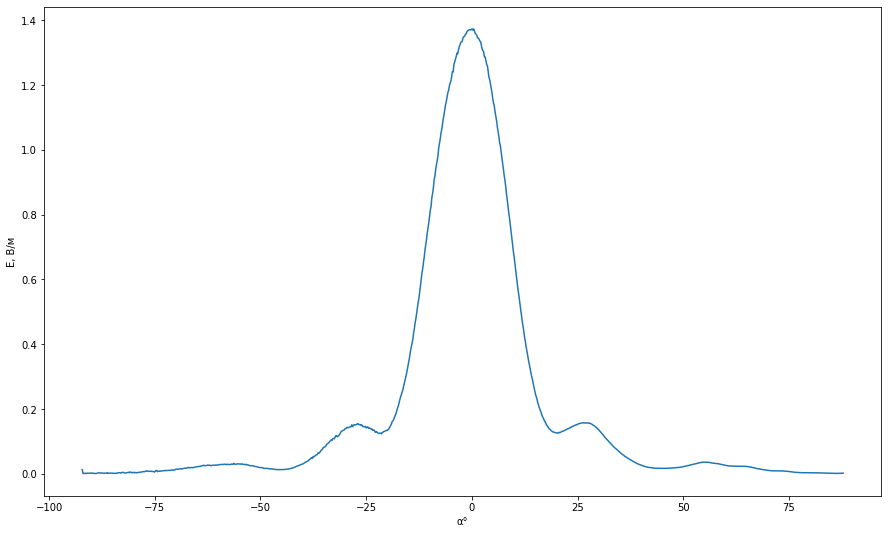

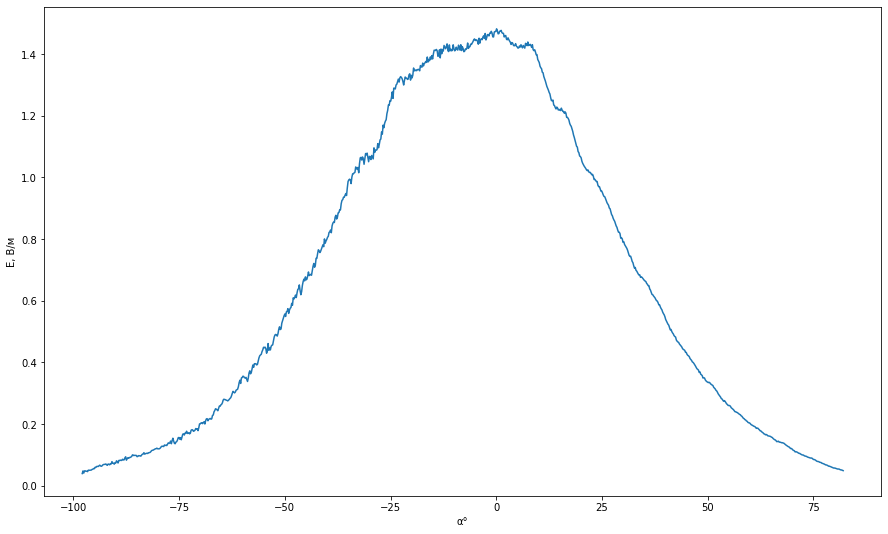

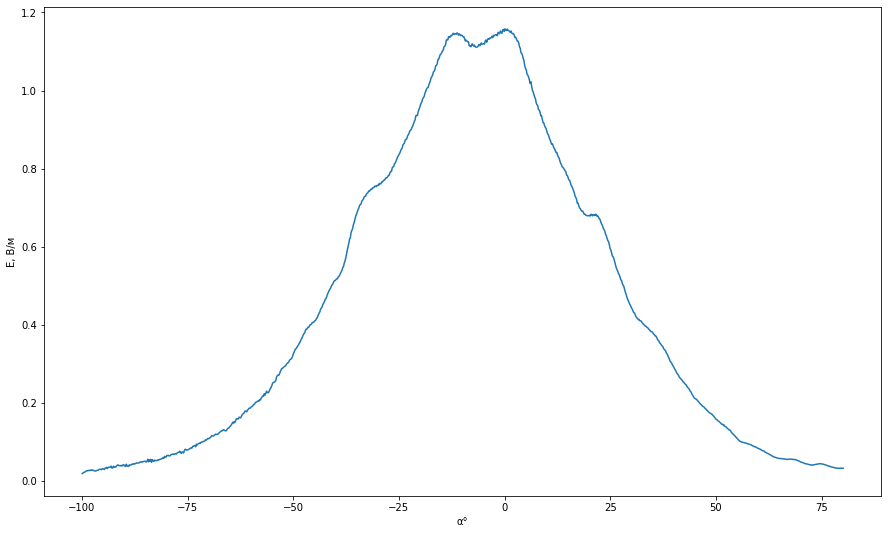

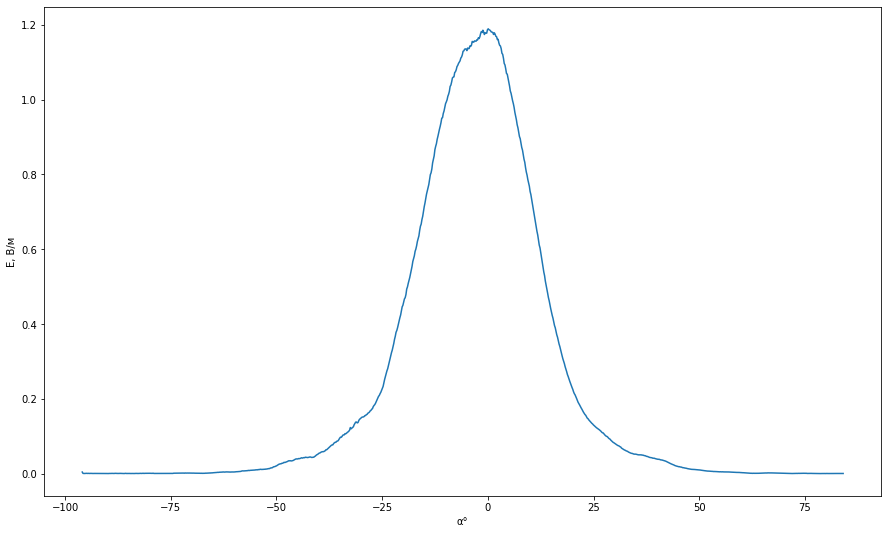

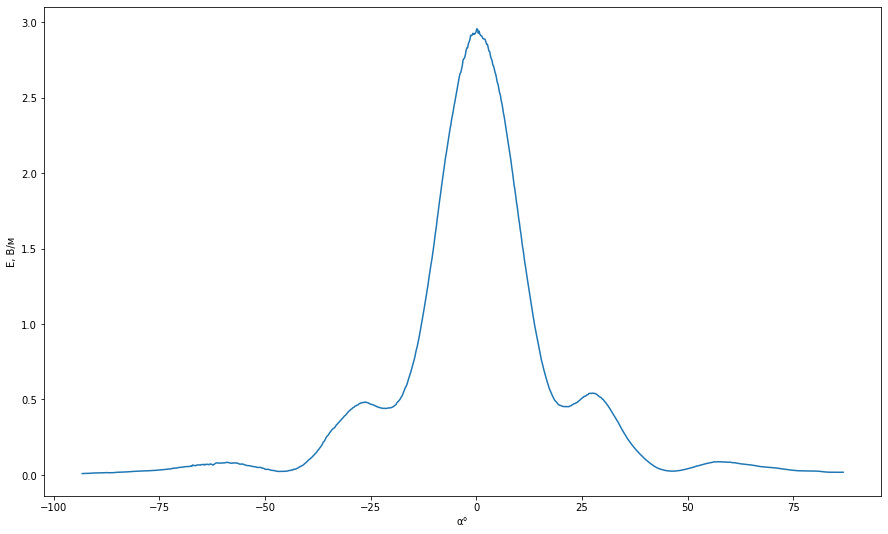

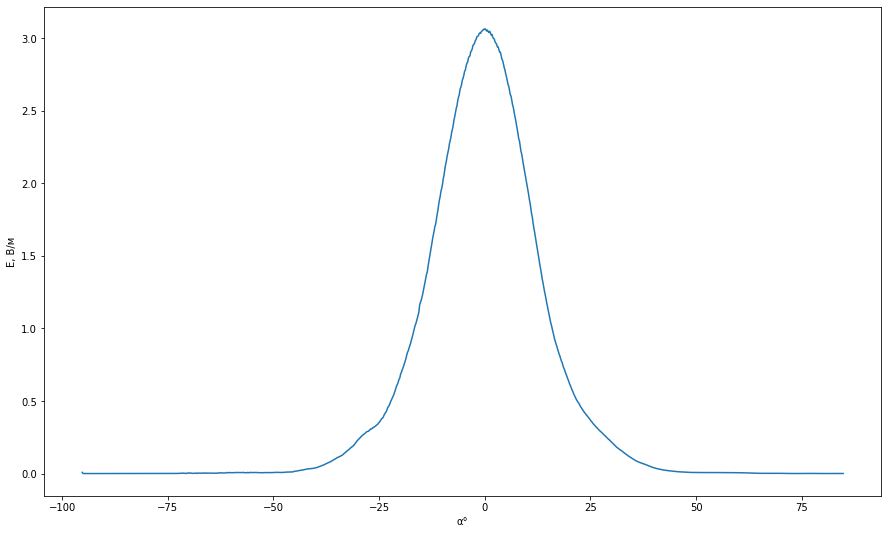

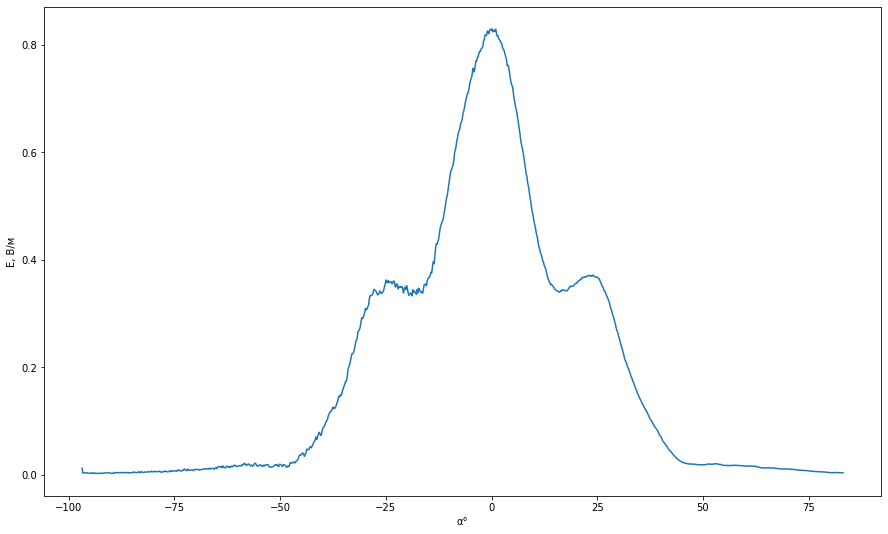

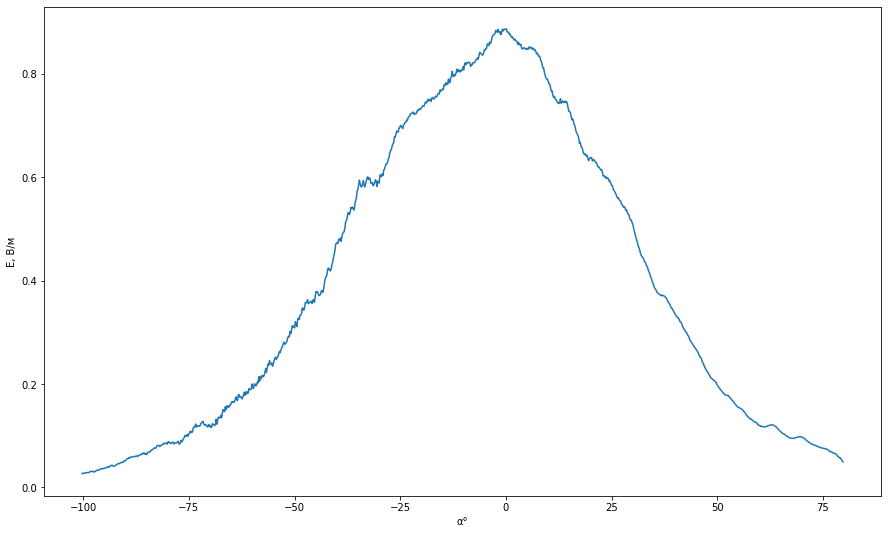

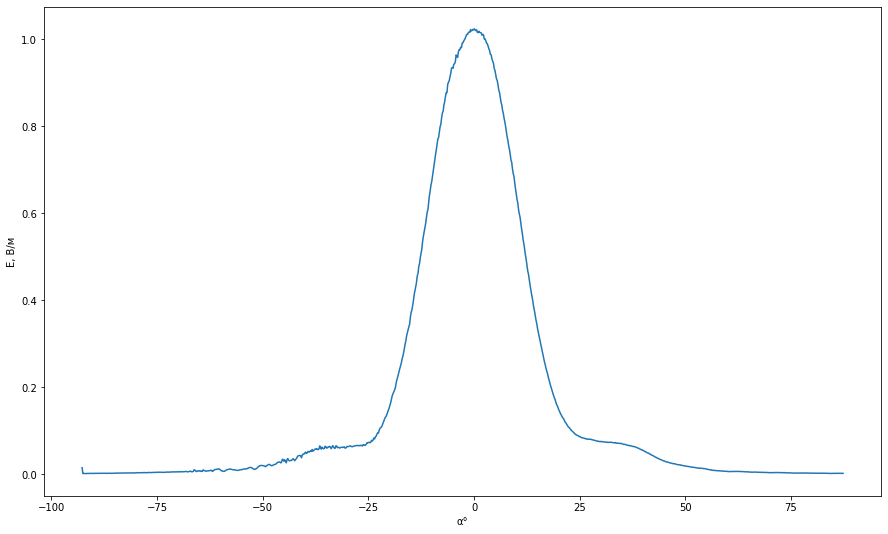

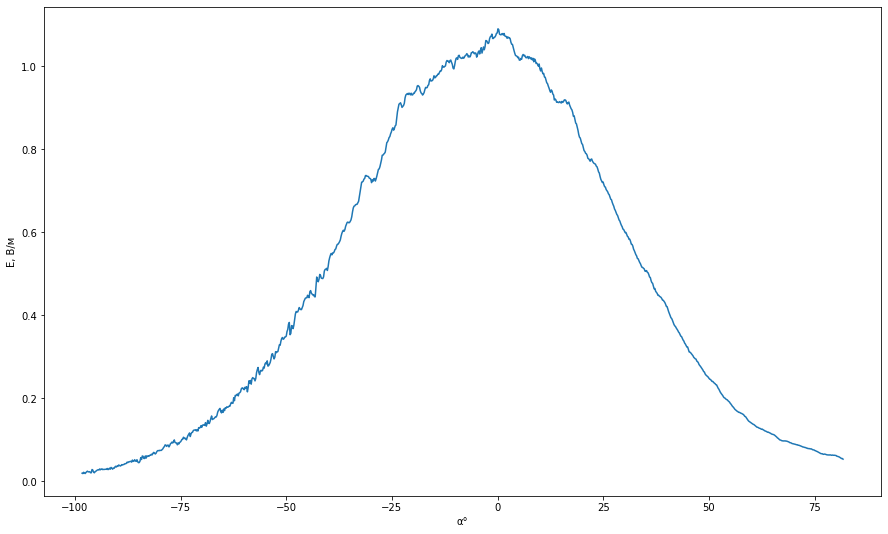

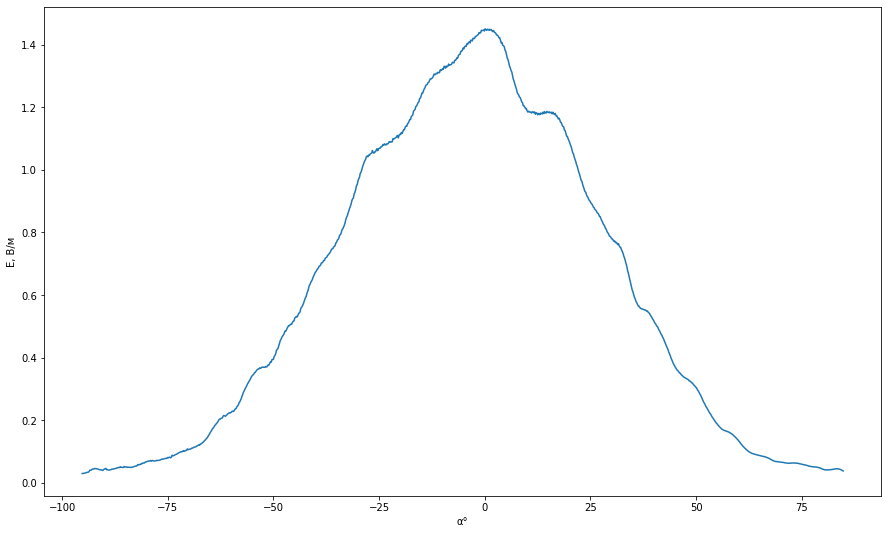

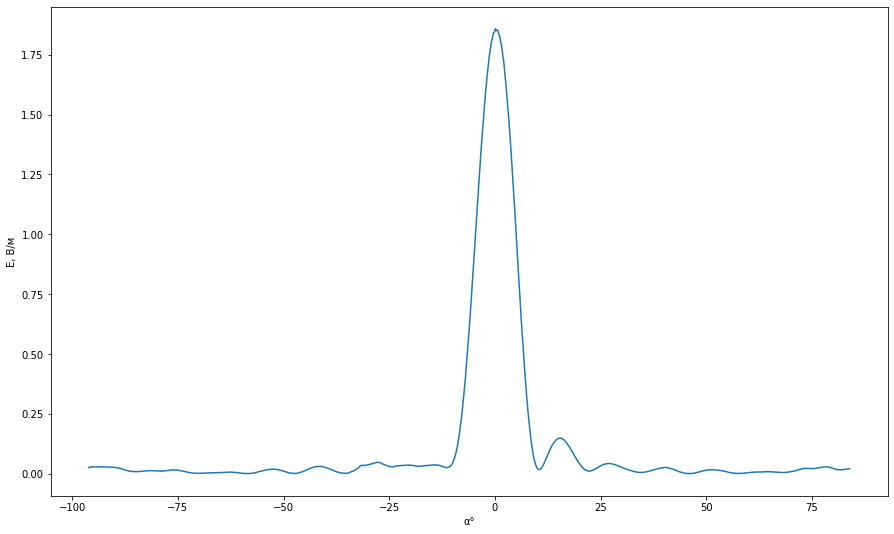

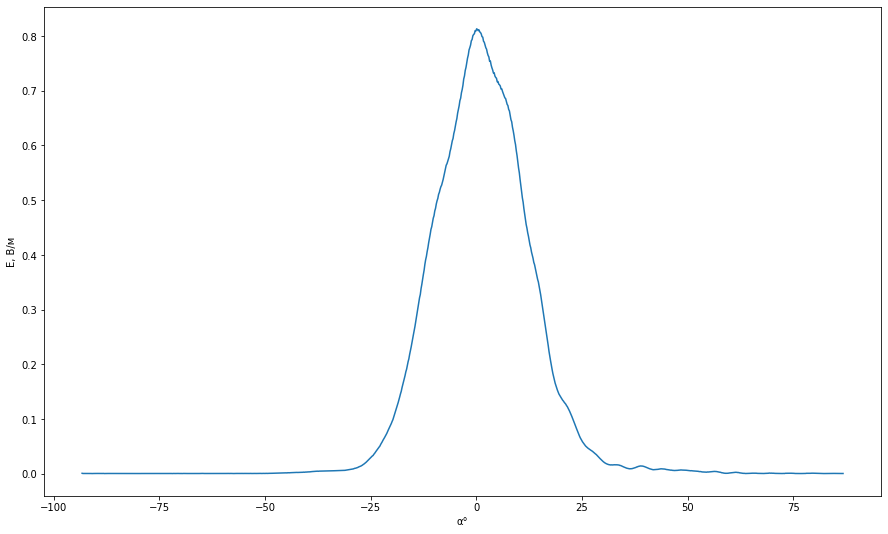

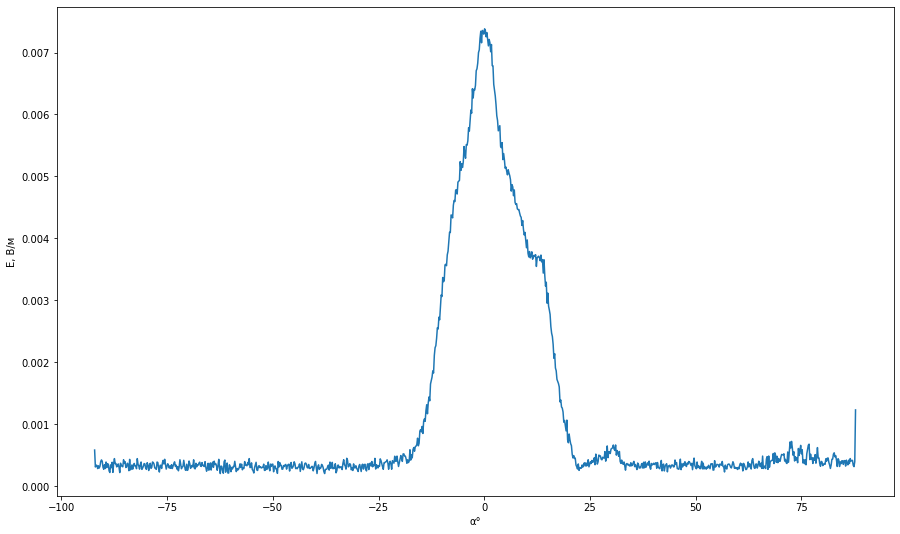

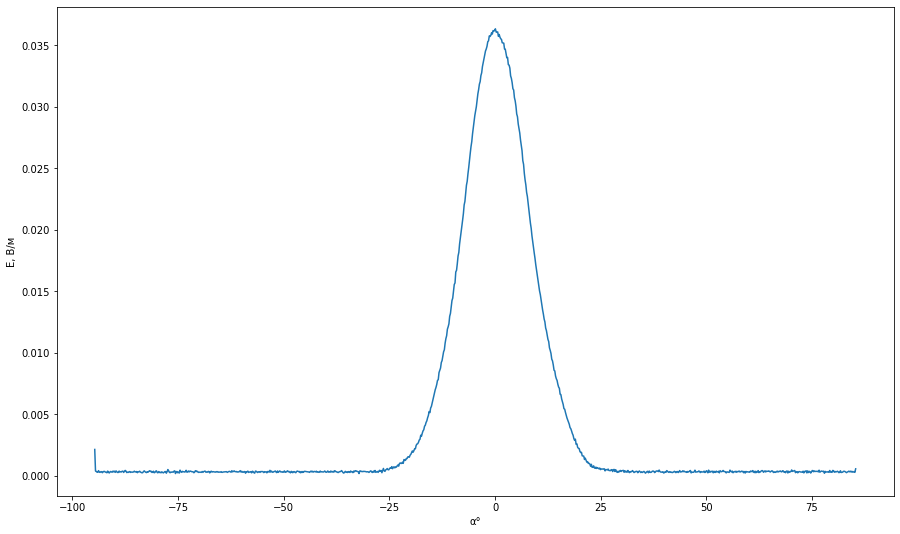

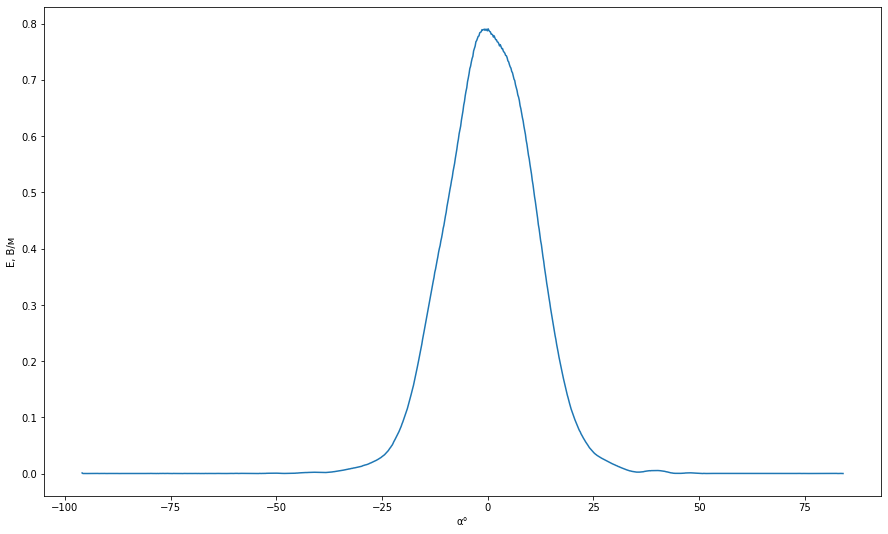

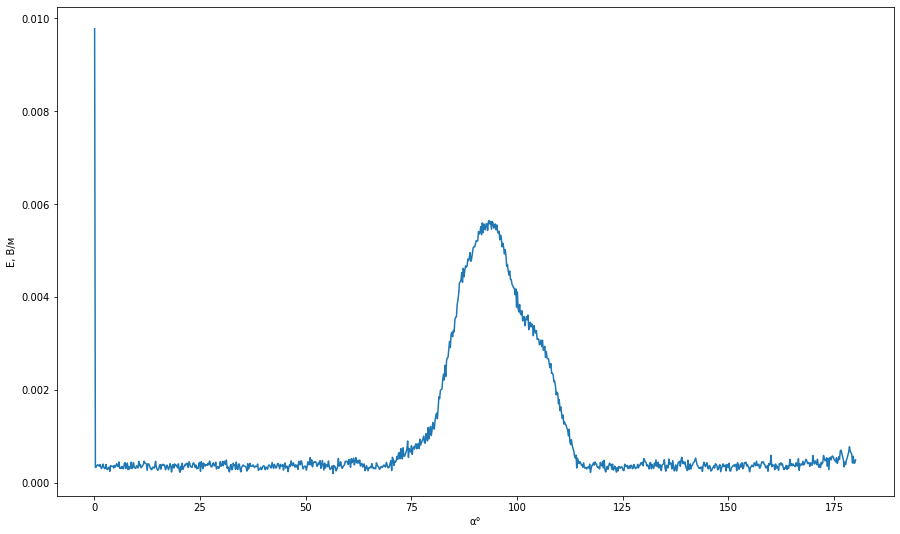

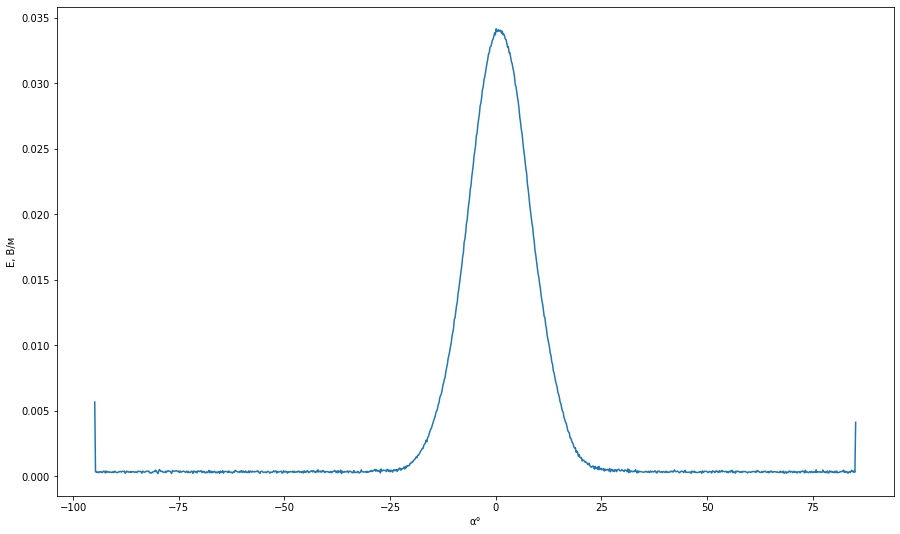

In [104]:
for file_name in file_names:
    df = pd.read_csv(path_source/ file_name, sep="\t", dtype=float)
    df.columns = ["degree", "intensive", "drop_it"]
    df = df.drop("drop_it", axis=1)
    df = transform(df)
    df.to_csv(path_edited / ("edited_" + file_name))
    plt = df.plot(x="degree", y="intensive", figsize=(15, 9), legend=False, xlabel="α°", ylabel="Е, В/м");
    plt.figure.savefig(path_edited / ("edited_" + file_name + ".png"))
    